<a href="https://colab.research.google.com/github/saiyaswanth883/DL_Lab/blob/main/DL_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron**

In [ ]:
# prompt: python code for perceptron in ml

import numpy as np

class Perceptron:
  def __init__(self, learning_rate=0.01, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.activation_func = self._unit_step_func
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # init parameters
    self.weights = np.zeros(n_features)
    self.bias = 0

    y_ = np.array([1 if i > 0 else 0 for i in y])

    for _ in range(self.n_iters):
      for i, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)

        # Update weights and bias
        update = self.lr * (y_[i] - y_predicted)
        self.weights += update * x_i
        self.bias += update

  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bias
    y_predicted = self.activation_func(linear_output)
    return y_predicted

  def _unit_step_func(self, x):
    return np.where(x >= 0, 1, 0)


# **Implementation of Auto Encoders**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

**Loading the Data Set**

In [4]:
(x_train,_), (x_test,_)=fashion_mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0241 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.008

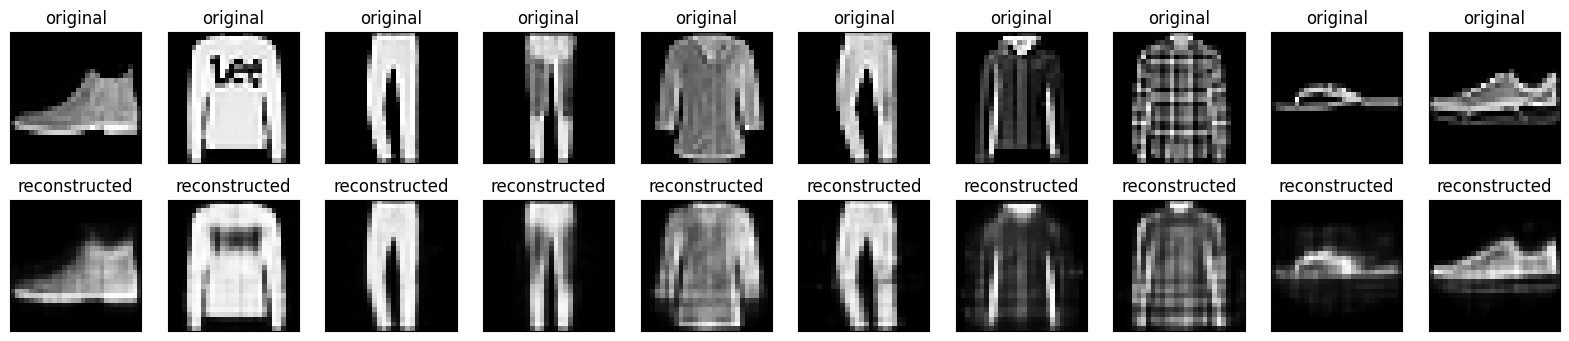

In [5]:
latent_dim=64

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder,self).__init__()
    self.latent_dim=latent_dim
    self.encoder=tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder=tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28,28))
    ])
  def call(self,x):
    encoded =self.encoder(x)
    decoded =self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1 )
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n )
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#**Image Denoising**

(60000, 28, 28, 1)


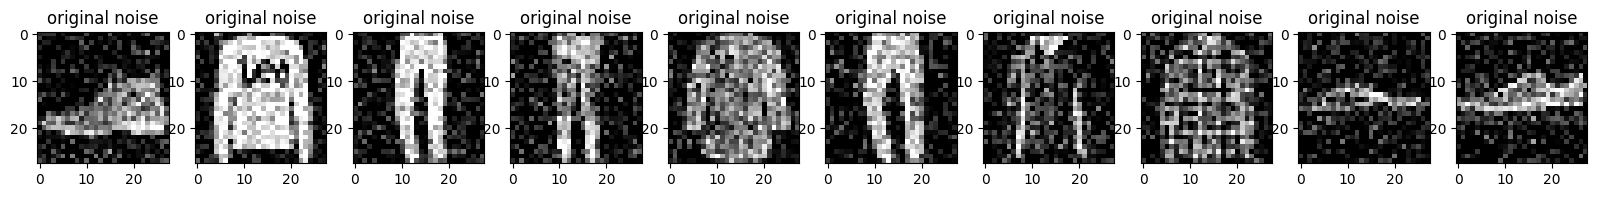

In [ ]:
(x_train,_), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train.shape)

# Adding random noise to the images.
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


#Plot the noisy images.
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.title("original noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
plt.show()

# **Convolutional Autoencoder**

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
  def call(self, x):
    encoded=self.encoder(x)
    decoded=self.decoder (encoded)
    return decoded
autoencoder=Denoise()

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=8, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/8
1875/1875 [==============================] - 43s 22ms/step - loss: 0.0165 - val_loss: 0.0098
Epoch 2/8
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 3/8
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 4/8
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 5/8
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 6/8
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 7/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 8/8
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0075 - val_loss: 0.0075


In [ ]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()

encoded_imgs=autoencoder.encoder(x_test).munpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      


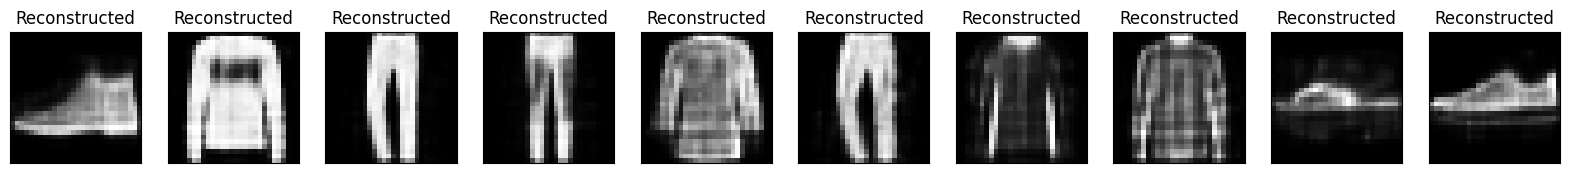

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.title("original + noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  bx = plt.subplot(2, n, i+1)
  plt.title("Reconstructed")
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.gray()
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)
plt.show()

# **Anomaly Detection**

In [49]:
dataframe=pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data=dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [50]:
labels=raw_data[:, -1]
data =raw_data[:,0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

#Normalize the data to [0,1].

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data-min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

train_labels=train_labels.astype(bool)
test_labels=test_labels.astype(bool)

normal_train_data=train_data[train_labels]
normal_test_data=test_data[test_labels]

anomalous_train_data=train_data[~train_labels]
anomalous_test_data=test_data[~test_labels]

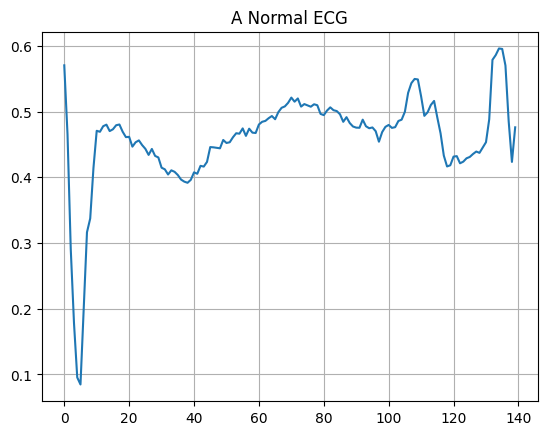

In [51]:
#Plotting a normal ECG.
plt.grid()
plt.plot(np.arange(140),normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

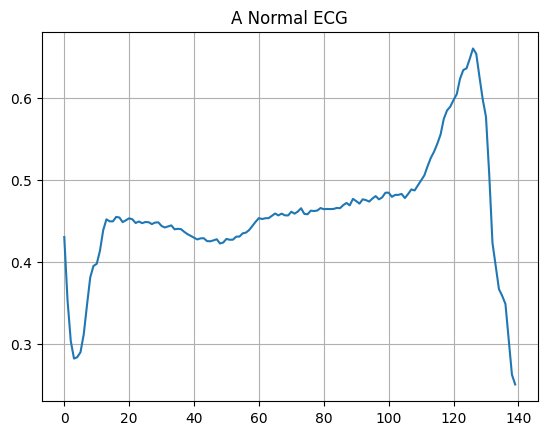

In [52]:
#PLot an anomalous ECG.
plt.grid()
plt.plot(np.arange(140),anomalous_train_data[0])
plt.title("A Normal ECG")
plt.show()

# **Build the Model**

In [53]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras. Sequential([ layers. Dense (32, activation="relu"), layers. Dense(16, activation="relu"), layers. Dense (8, activation="relu")])
    self.decoder = tf.keras.Sequential([ layers. Dense(16, activation="relu"), layers. Dense (32, activation="relu"), layers. Dense (140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder (encoded)
    return decoded
autoencoder=AnomalyDetector()

autoencoder.compile(optimizer='adam', loss='mae')

history=autoencoder.fit(normal_train_data, normal_train_data,epochs=20,batch_size=512,validation_data=(test_data, test_data),shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 49ms/step - loss: 0.0583 - val_loss: 0.0537
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0570 - val_loss: 0.0528
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0558 - val_loss: 0.0518
Epoch 4/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0544 - val_loss: 0.0505
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0524 - val_loss: 0.0488
Epoch 6/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0493 - val_loss: 0.0467
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0453 - val_loss: 0.0451
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0414 - val_loss: 0.0433
Epoch 9/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0378 - val_loss: 0.0413
Epoch 10/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0346 - val_loss: 0.0400
Epoch 11/20
5/5 [============

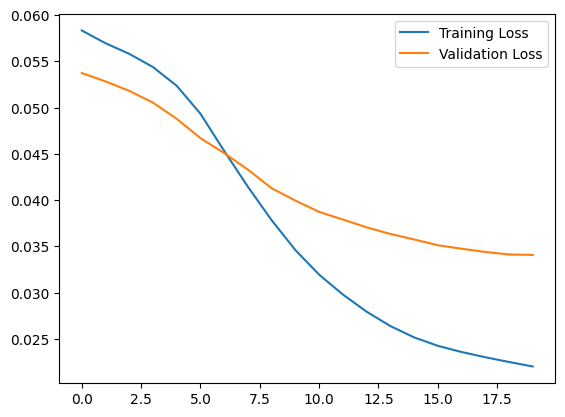

In [54]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()

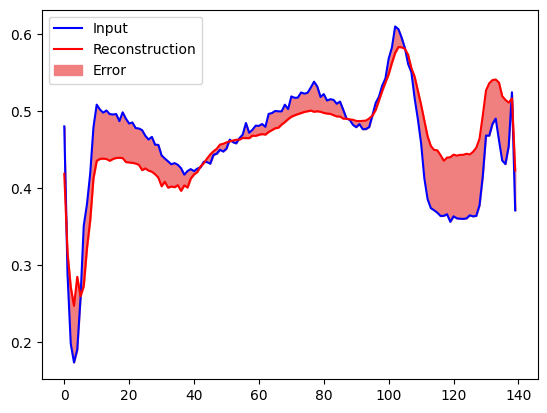

In [55]:
encoded_imgs=autoencoder.encoder(normal_test_data).numpy()
decoded_imgs=autoencoder.decoder (encoded_imgs).numpy()
plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

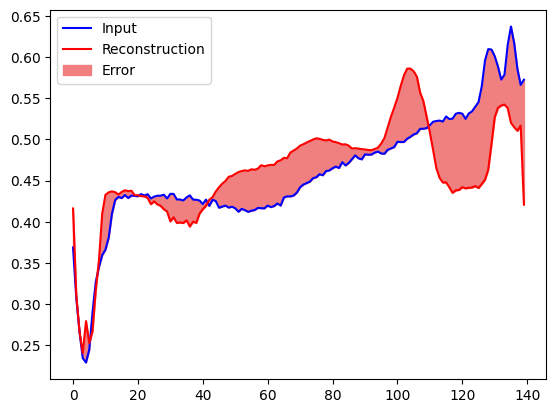

In [56]:
#Creating a similar plot, this time for an anomalous test exmaple.
encoded_imgs=autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs=autoencoder.decoder (encoded_imgs).numpy()
plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

74/74 [==============================] - 0s 1ms/step


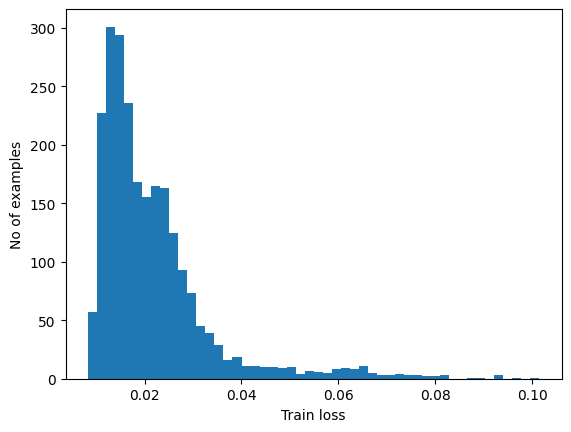

In [57]:
# Detecting Anomalies
reconstructions = autoencoder.predict(normal_train_data)
train_loss=tf.keras.losses.mae(reconstructions,normal_train_data)
plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [58]:
threshold=np.mean(train_loss)+np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03385413


52/52 [==============================] - 0s 2ms/step


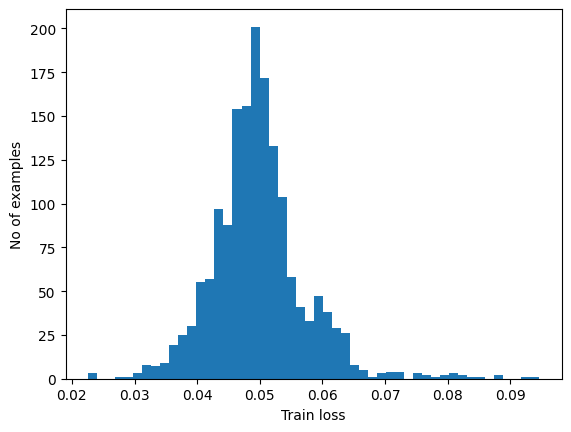

In [59]:
reconstructions = autoencoder.predict(anomalous_train_data)
train_loss=tf.keras.losses.mae(reconstructions,anomalous_train_data)
plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [68]:
#Classifying an ECG as an anomaly if the reconstruction error is greater than the threshold
def predict(model,data,threshold):
  reconstructions=model(data)
  loss=tf.keras.losses.mae(reconstructions,data)
  return tf.math.less(loss, threshold)
def print_stats(predictiojns, labels):
  print("Accuracy={}".format(accuracy_score(labels, preds)))
  print("Precision={}",format(precision_score(labels, preds)))
  print("Recall={}",format(recall_score(labels, preds)))

preds=predict(autoencoder,test_data,threshold)
print_stats(preds,test_labels)

Accuracy=0.944
Precision={} 0.9921875
Recall={} 0.9071428571428571
